In [2]:

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from xgboost import XGBRegressor


In [64]:
anaemia_full=pd.read_excel('c:\\Anaemia-Ashleigh\\anaemia_data_knime.xlsx')
anaemia_full.head()


,Site,Date,Dataset No.,Dataset_Name,Diagnosis,Fish No.,Length (cm),Avg Weight (g),AGD,PGD,...,Mg mmol/L,P mmol/L,K mmol/L,TP g/L,Na mmol/L,Zn umol/L,Aldolase u/L,Ammonia umol/L,CK-MB u/L,CO2 mmol/L
0,Ardintoul,171019,1,Dataset1,Amber,1,NaN,1900,1.5,1.6,...,1.32,4.93,1.95,42.1,261.3,300.66,98.7,667.8,11440.0,9.7
1,Ardintoul,171019,2,Dataset1,Amber,2,NaN,1900,1.5,1.6,...,NaN,5.98,2.55,50.6,271.7,NaN,111.0,774.2,11740.0,NaN
2,Ardintoul,171019,3,Dataset1,Red,3,NaN,1900,1.5,1.6,...,1.37,4.89,2.03,41.3,261.8,206.80,62.0,713.6,5700.0,11.8
3,Ardintoul,171019,4,Dataset1,Red,4,NaN,1900,1.5,1.6,...,NaN,5.38,2.70,41.4,268.1,257.13,117.0,839.5,12880.0,NaN
4,Ardintoul,171019,5,Dataset1,Red,5,NaN,1900,1.5,1.6,...,1.64,6.42,2.42,44.5,264.8,318.22,80.3,891.7,6520.0,12.9


In [65]:
y = anaemia_full['Diagnosis']
y.head()

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

0    Amber
1    Amber
2      Red
3      Red
4      Red
Name: Diagnosis, dtype: object

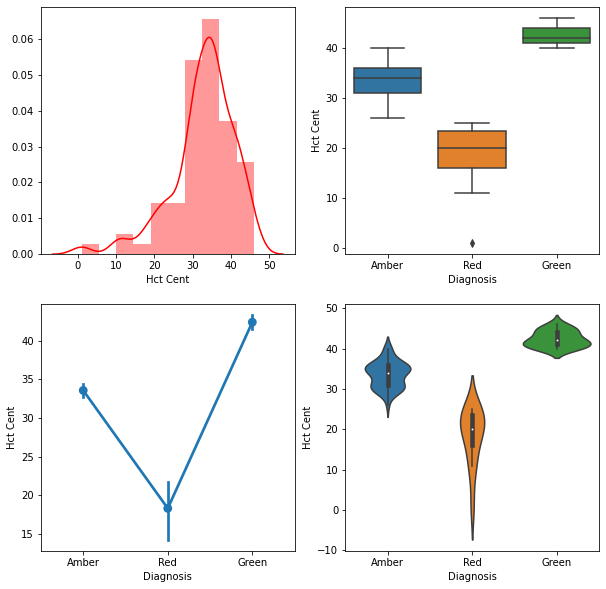

In [5]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(anaemia_full['Hct Cent'],bins=10,color='r',ax=ax1)
sns.boxplot(y='Hct Cent',x='Diagnosis',data=anaemia_full,ax=ax2)
sns.pointplot(y='Hct Cent',x='Diagnosis',data=anaemia_full,ax=ax3)
sns.violinplot(y='Hct Cent',x='Diagnosis',data=anaemia_full,ax=ax4)

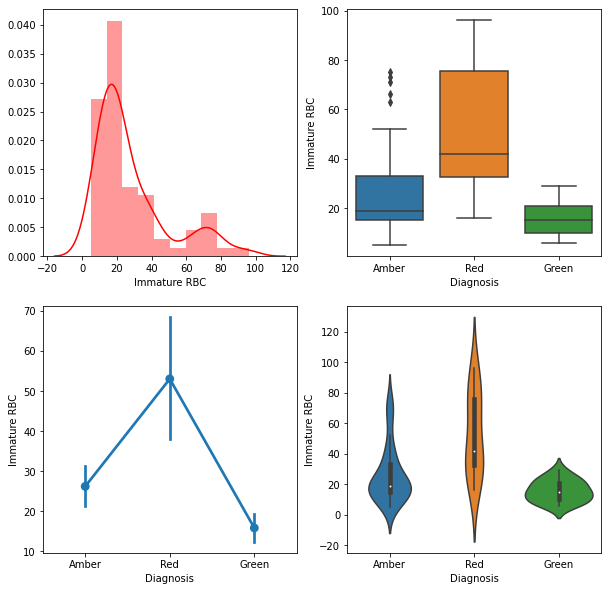

In [6]:
#https://www.kaggle.com/sudhirnl7/logistic-regression-with-stratifiedkfold
fig,ax = plt.subplots(2,2,figsize=(10,10))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(anaemia_full['Immature RBC'],bins=10,color='r',ax=ax1)
sns.boxplot(y='Immature RBC',x='Diagnosis',data=anaemia_full,ax=ax2)
sns.pointplot(y='Immature RBC',x='Diagnosis',data=anaemia_full,ax=ax3)
sns.violinplot(y='Immature RBC',x='Diagnosis',data=anaemia_full,ax=ax4)

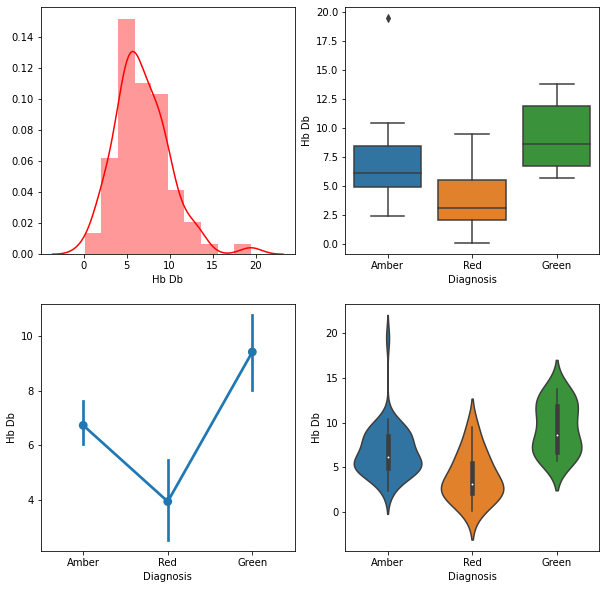

In [7]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(anaemia_full['Hb Db'],bins=10,color='r',ax=ax1)
sns.boxplot(y='Hb Db',x='Diagnosis',data=anaemia_full,ax=ax2)
sns.pointplot(y='Hb Db',x='Diagnosis',data=anaemia_full,ax=ax3)
sns.violinplot(y='Hb Db',x='Diagnosis',data=anaemia_full,ax=ax4)


In [8]:
# def outlier(df,columns):
#     for i in columns:
#         quartile_1,quartile_3 = np.percentile(df[i],[25,75])
#         quartile_f,quartile_l = np.percentile(df[i],[1,99])
#         IQR = quartile_3-quartile_1
#         lower_bound = quartile_1 - (1.5*IQR)
#         upper_bound = quartile_3 + (1.5*IQR)
#         print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
#         df[i].loc[df[i] < lower_bound] = quartile_f
#         df[i].loc[df[i] > upper_bound] = quartile_l
# num_col = ['Hb Db','Immature RBC']       
# outlier(anaemia_full,num_col)
# outlier(anaemia_full,num_col)

In [70]:
# X=anaemia_full.drop({['Diagnosis'],['Dataset No.'],['Fish No.'],['Date']}, axis=1)
# X=anaemia_full.drop(['Site','Diagnosis','Dataset No.','Fish No.','Dataset_Name','Date','Length (cm)', 'Hct Cent'], axis=1)
X=anaemia_full.drop(['Diagnosis','Site','Dataset No.','Fish No.','Dataset_Name','Date','Length (cm)'], axis=1)

In [71]:
#X.isnull().sum().sum()
#X.isnull().mean()
pct_null =X.isnull().sum() / len(X)
missing_features = pct_null[pct_null > 0.75].index
print(missing_features)
X.drop(missing_features, axis=1, inplace=True)

Index(['M', 'Ca mmol/L', 'Cu umol/L', 'Lactate mmol/L', 'Mg mmol/L',
       'Zn umol/L', 'Ammonia umol/L', 'CO2 mmol/L'],
      dtype='object')


In [72]:

X.fillna(X.mean(), inplace=True)
#X.describe()



In [73]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12, stratify=y)
# X_test.head()

In [51]:
# cor = X_train.corr()
# plt.figure(figsize=(18,18))
# sns.heatmap(cor,cmap='Set1',annot=True)

In [74]:
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
seed =12
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
pred_test_full =0

# y_test= LabelEncoder().fit_transform(y_test)
# list(le.classes_)
# cv_score =[]
# le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# print(le_name_mapping)


1 of KFold 5
Confusion matrix
 [[7 2 0]
 [2 0 0]
 [1 0 2]]
classification_report
               precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.00      0.00      0.00         2
           2       1.00      0.67      0.80         3

    accuracy                           0.64        14
   macro avg       0.57      0.48      0.51        14
weighted avg       0.66      0.64      0.65        14

2 of KFold 5
Confusion matrix
 [[6 2 1]
 [2 0 0]
 [2 0 0]]
classification_report
               precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2

    accuracy                           0.46        13
   macro avg       0.20      0.22      0.21        13
weighted avg       0.42      0.46      0.44        13

3 of KFold 5
Confusion matrix
 [[8 0 0]
 [2 1 0]
 [0 0 2]]
classification_

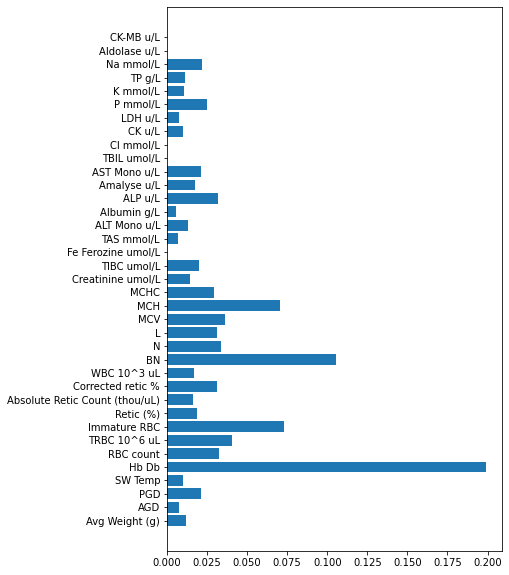

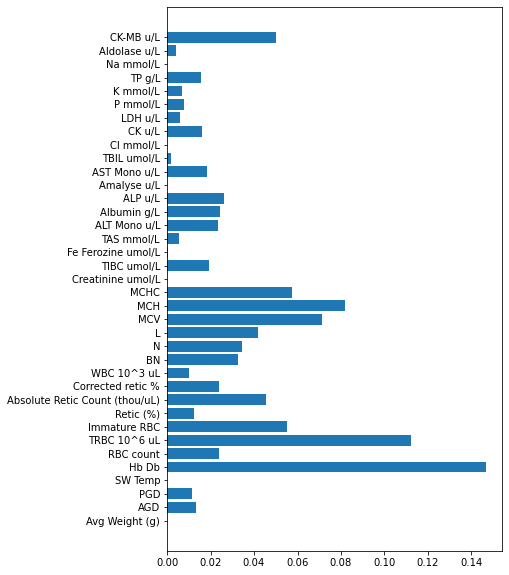

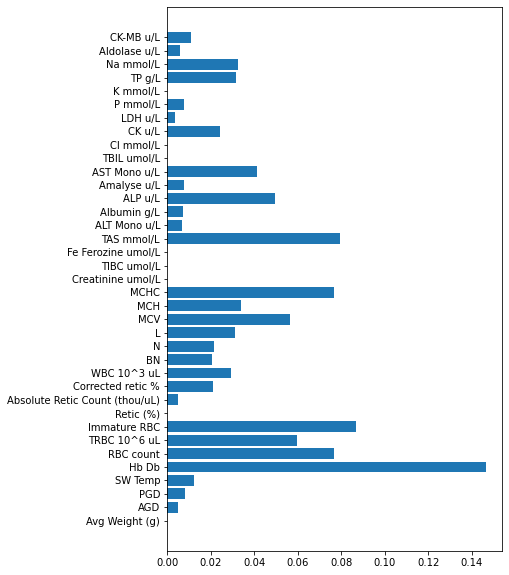

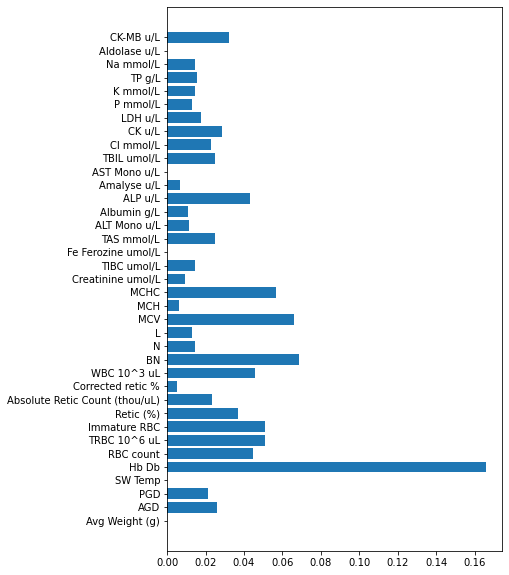

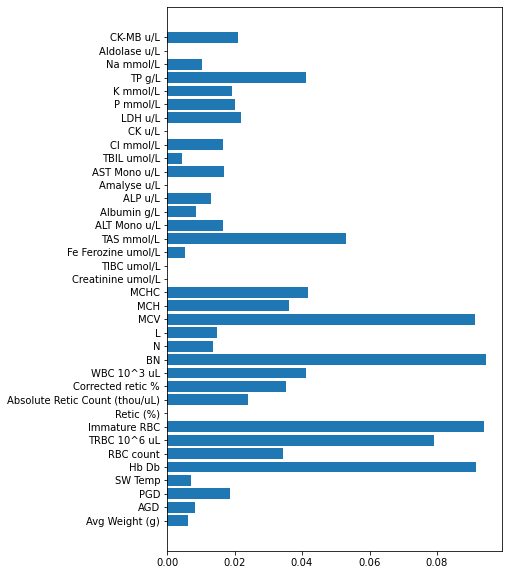

In [54]:
# i=1
# for train_index,test_index in kf.split(X_train,y_train):
#     print('{} of KFold {}'.format(i,kf.n_splits))
#     xtr,xvl = X_train.iloc[train_index],X_train.iloc[test_index]
#     ytr,yvl = y_train.iloc[train_index],y_train.iloc[test_index]
# #     n1=[xtr,ytr]
# #     n=pd.concat(n1,axis=1)
# #     n.to_csv('my_tr.csv')
# #     n2=[xvl,yvl]
# #     n3=pd.concat(n2,axis=1)
# #     n3.to_csv('my_val.csv')
       
#     ytr1= LabelEncoder().fit_transform(ytr)
#     yvl1= LabelEncoder().fit_transform(yvl)
    
#     model = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
#     model.fit(xtr,ytr1)
#     plt.figure(figsize=(6,10))
#     plt.barh(X.columns, model.feature_importances_)
#     print('Confusion matrix\n',confusion_matrix(yvl1,model.predict(xvl)))
#     print('classification_report\n',classification_report(yvl1,model.predict(xvl)))

# #     score = roc_auc_score(yvl,model.predict(xvl))
# #     print('ROC AUC score:',score)
# #     cv_score.append(score)    
#     pred_test = model.predict_proba(X_test)[:,1]
#     pred_test_full +=pred_test
#     i+=1
#     n1=[xtr,ytr]
#     n=pd.concat(n1,axis=1)
#     n.to_csv('my_tr.csv')
#     n2=[xvl,yvl]
#     n3=pd.concat(n2,axis=1)
#     n3.to_csv('my_val.csv')
    

In [75]:

X.insert(1,'iteration', 0)
X.insert(0,'set', 'str')
X_train1 = pd.DataFrame(data=None, columns=X.columns,index=X.index)
X_train1.dropna()
fold = 1
for train_index, validate_index in kf.split(X,y):        
    XtrainDF = X.iloc[train_index]
    ytrainDF = y.iloc[train_index]
    XvalidateDF = X.iloc[validate_index]
    yvalidateDF = y.iloc[validate_index]
    trainDF=pd.concat([XtrainDF,ytrainDF], axis=1)
    validateDF=pd.concat([XvalidateDF,yvalidateDF], axis=1)
    trainDF[['set', 'iteration']] = 'T', fold
    validateDF[['set', 'iteration']] = 'V', fold
    print("Fold #{}, Training Size: {}, Validation Size: {}".format(fold,len(trainDF),len(validateDF)))
    fold+=1
    X_train1 = pd.concat([X_train1, validateDF,trainDF])
    X_train1.to_csv("kfold5v2.csv")
print(X_train1)

Fold #1, Training Size: 62, Validation Size: 16
Fold #2, Training Size: 62, Validation Size: 16
Fold #3, Training Size: 62, Validation Size: 16
Fold #4, Training Size: 63, Validation Size: 15
Fold #5, Training Size: 63, Validation Size: 15
    set Avg Weight (g) iteration  AGD  PGD SW Temp  Hb Db  Hct Cent  \
0   NaN            NaN       NaN  NaN  NaN     NaN    NaN       NaN   
1   NaN            NaN       NaN  NaN  NaN     NaN    NaN       NaN   
2   NaN            NaN       NaN  NaN  NaN     NaN    NaN       NaN   
3   NaN            NaN       NaN  NaN  NaN     NaN    NaN       NaN   
4   NaN            NaN       NaN  NaN  NaN     NaN    NaN       NaN   
..  ...            ...       ...  ...  ...     ...    ...       ...   
71    T           4000         5  0.0  2.0      11   9.93      35.0   
73    T           4000         5  0.0  2.0      11   4.87      30.0   
74    T           4000         5  0.0  3.0      11   0.11       1.0   
76    T           4000         5  0.0  1.0      11

In [77]:
# plt.figure(figsize=(6,10))
# plt.barh(X.columns, model.feature_importances_)

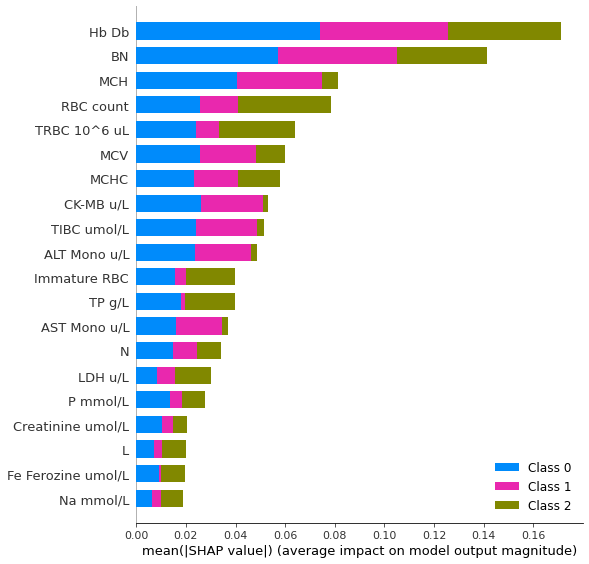

In [78]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [79]:
#https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(X_test)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], X_test.iloc[[j]])
    return(p)

shap_plot(0)

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [61]:
shap_plot(1)

In [63]:
shap_plot(3)

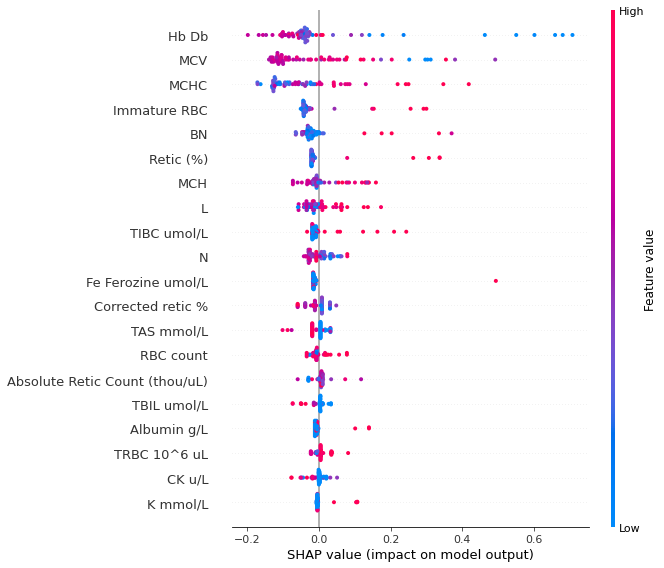

In [51]:
#https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
shap.summary_plot(shap_values, X_train)

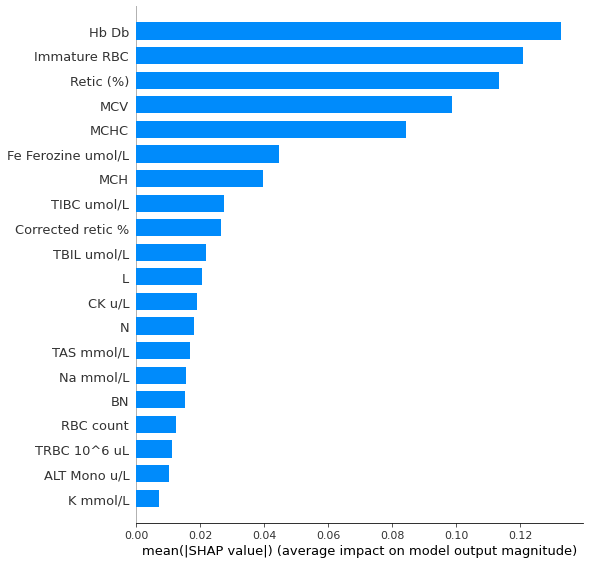

In [52]:
#SHAP (SHapley Additive exPlanations)
shap.summary_plot(rf_shap_values, X_test, plot_type="bar")

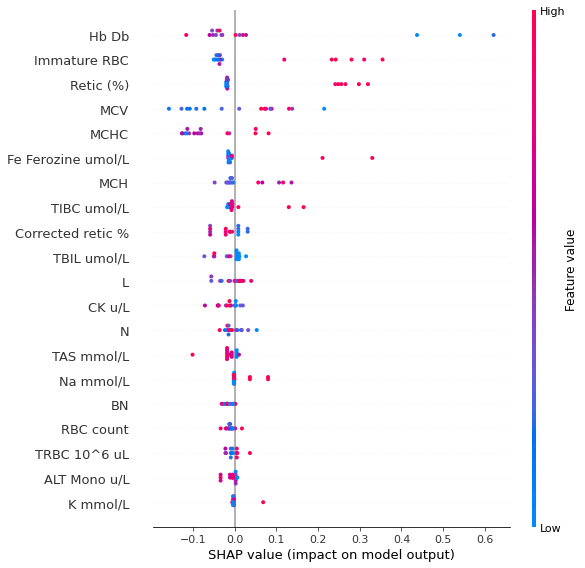

In [48]:
import matplotlib.pyplot as plt
f = plt.figure()
rf_shap_values = shap.TreeExplainer(model).shap_values(X_test)
shap.summary_plot(rf_shap_values, X_test)


Text(0.5, 0, 'Permutation Importance')

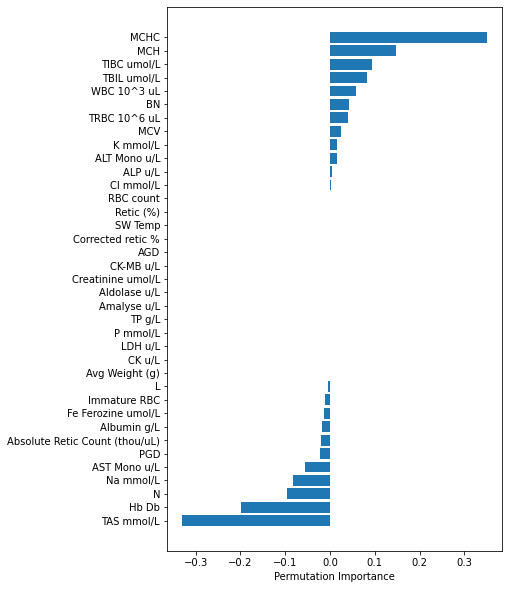

In [28]:
perm_importance = permutation_importance(model, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(6,10))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

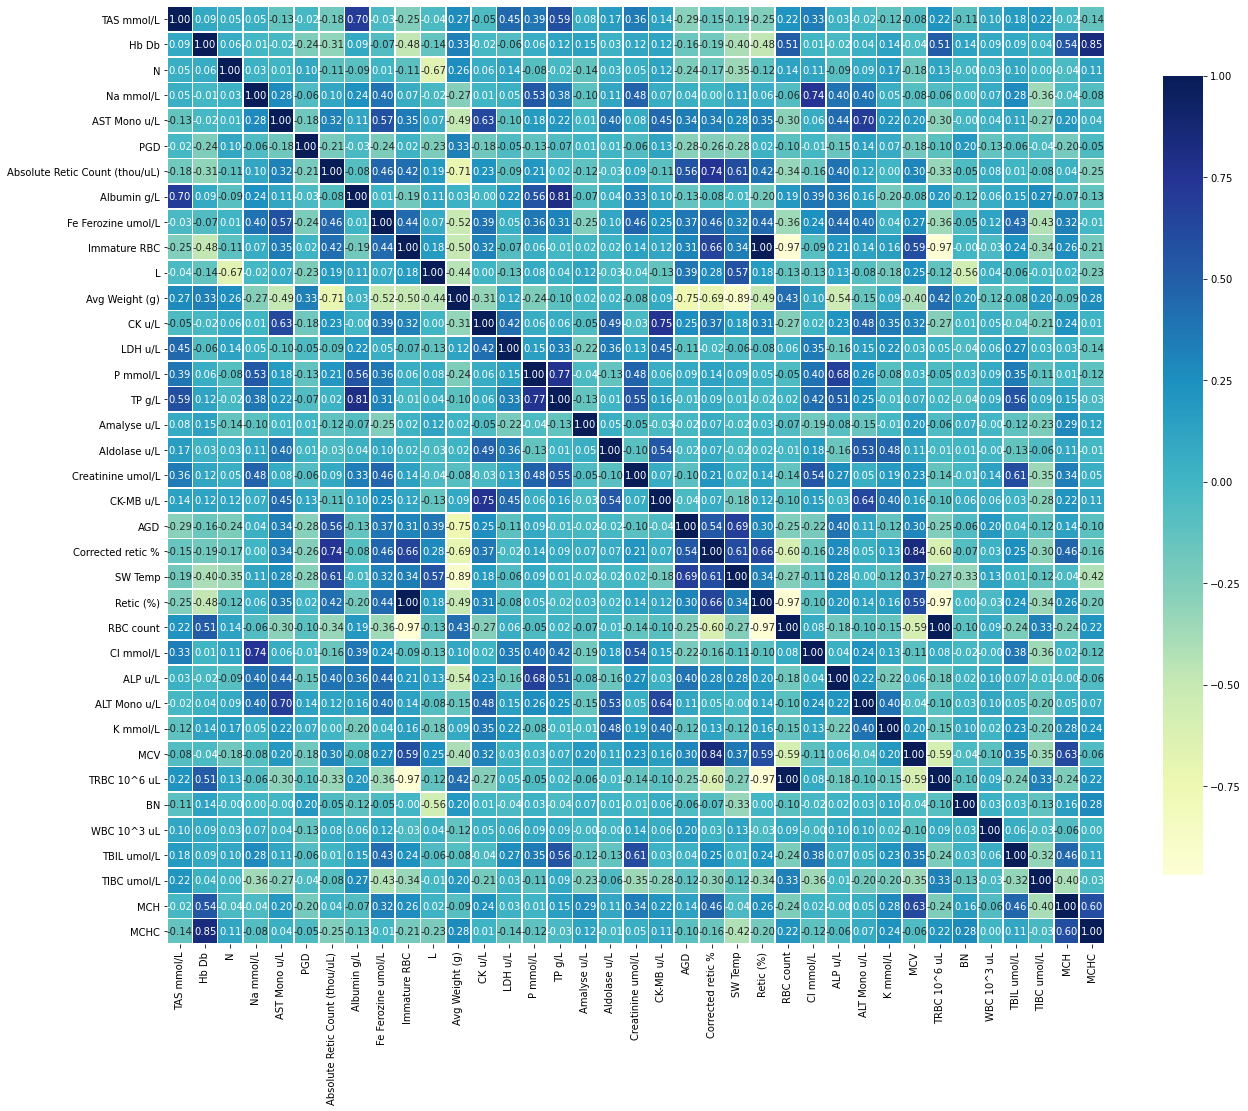

In [29]:

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(21,21))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(X_train[X.columns[sorted_idx]])